# train models (dangerous, overites data)

In [67]:
# vanilla fedavg
! python server.py -nc 200 -cf 0.2 -of fedavg-c0.2


/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mattie/miniconda3/envs/Fe

In [95]:
# fogFL
! python server_hierar.py -nc 200 -cf 0.1 -ns 6  -of fogfl-c0.1-v0.03-e5

/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mattie/miniconda3/envs/Fe

In [125]:
# fogFL ng
! python server_distrib.py -nc 200 -cf 0.2 -ns 6 -srf 0.4 -of fogfl-ng-c0.2-v0.03-a0.4

/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mattie/miniconda3/envs/FedAvg-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mattie/miniconda3/envs/Fe

# Obeservations, ML

In [105]:
import os
import sys
from matplotlib import pyplot as plt
import json
from typing import List

DATA_DIR = 'obeserve'
MAX_ROUNDS = 20


In [126]:
# get ml metrics per round
def get_ml_metric(metric_key: str, data_file: str, max_rounds: int):
    with open(data_file, 'r') as f:
        data = json.load(f)
        vals = []
        for round_data in data['data'][0:MAX_ROUNDS]:
            vals.append(round_data[metric_key])
        return vals

In [127]:
data_files = []
for d in os.listdir(DATA_DIR):
    if os.path.isfile(os.path.join(DATA_DIR, d)):
        data_files.append(d)

In [128]:
# function for plotting metric
def plot_metric(metric_key: str, data_files: List[str], rounds: int):
    plt.figure(0)
    x_vals = range(1, rounds + 1)
    for d in data_files:
        y_vals = get_ml_metric(metric_key, f'{DATA_DIR}/{d}', MAX_ROUNDS)
        plt.plot(x_vals, y_vals, label=d)
    plt.legend()
    plt.xlabel('communication rounds')
    plt.xticks(x_vals)
    plt.ylabel(metric_key)
    plt.show()

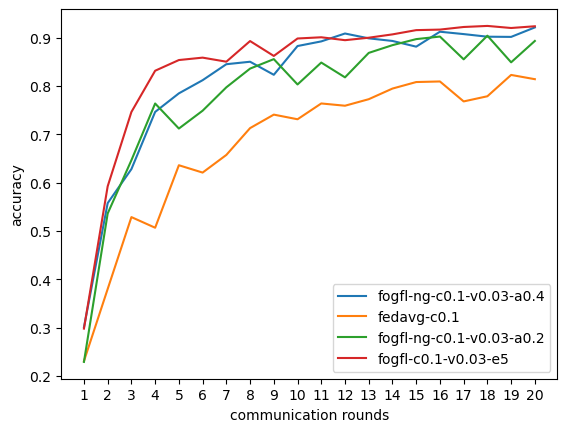

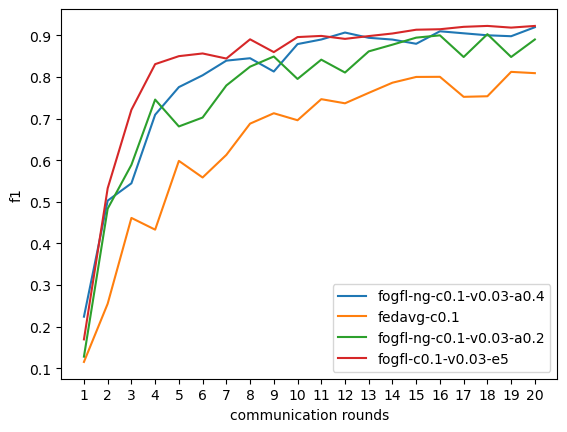

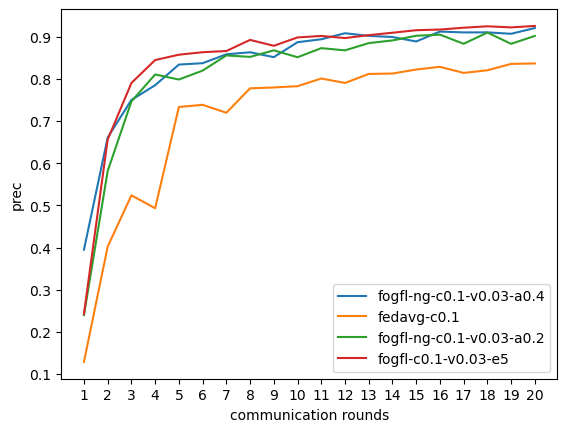

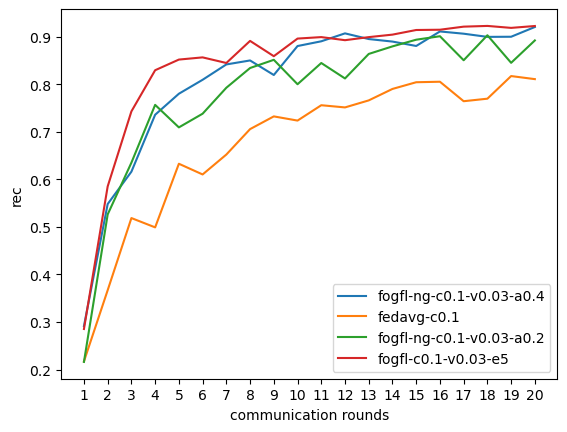

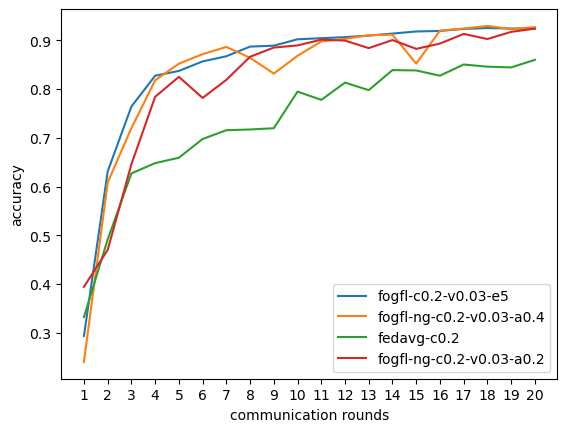

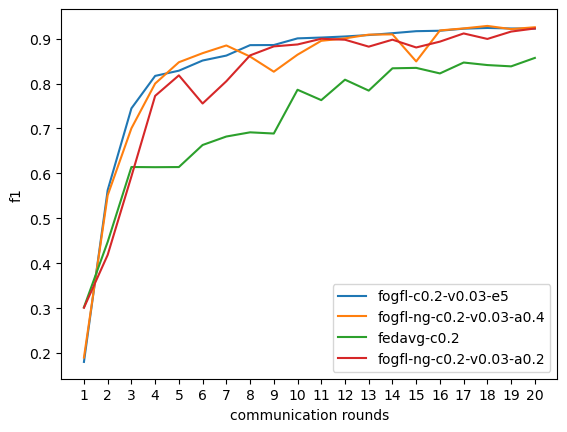

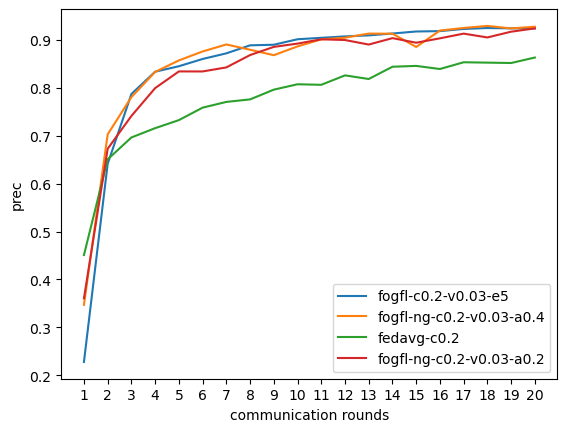

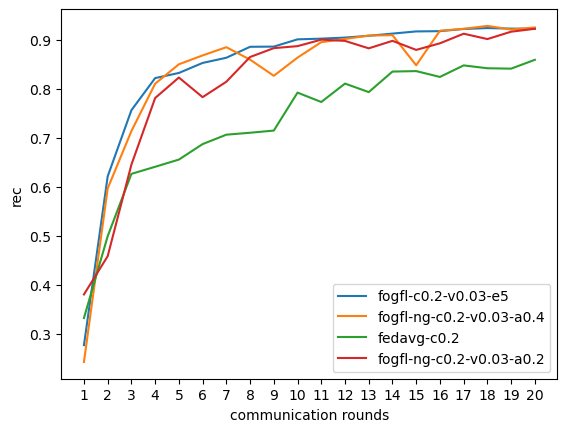

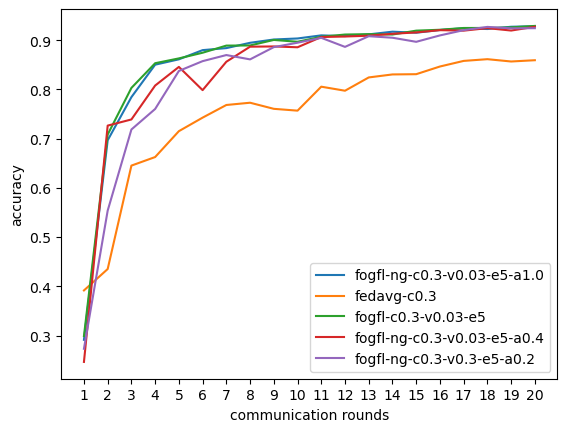

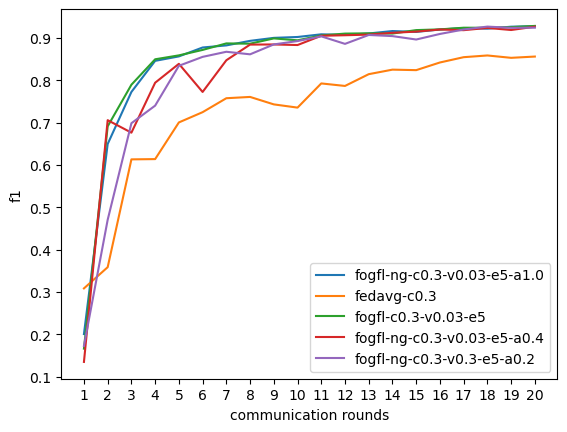

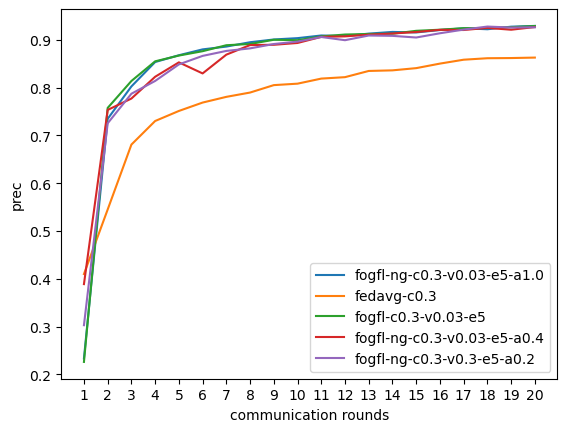

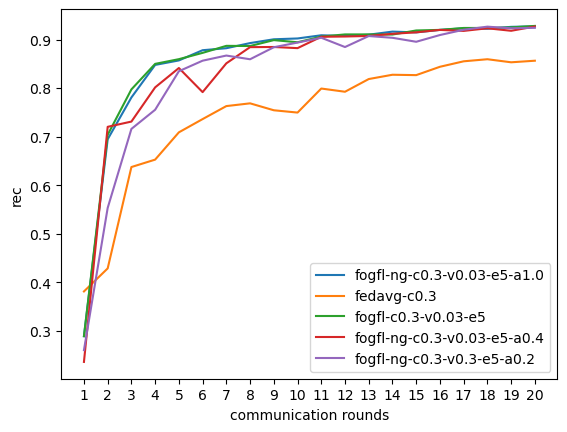

In [129]:
def plot_metric_per_c(cvals: List[int]):
    for c in cvals:
        data_files_to_take = []
        for d in data_files:
            if d.find(f'c{c}') != -1:
                data_files_to_take.append(d)
        
        plot_metric('accuracy', data_files_to_take, MAX_ROUNDS)
        plot_metric('f1', data_files_to_take, MAX_ROUNDS)
        plot_metric('prec', data_files_to_take, MAX_ROUNDS)
        plot_metric('rec', data_files_to_take, MAX_ROUNDS)

plot_metric_per_c([0.1, 0.2, 0.3])

In [ ]:
# other metrics
